Merging Data of all years

In [6]:
import xarray as xr
import os

file_paths = [
    r"B:\ml modeling project course\Hackathon\data\2022daily.nc",
    r"B:\ml modeling project course\Hackathon\data\2023daily.nc",
    r"B:\ml modeling project course\Hackathon\data\2024daily.nc"
]

datasets = []
for path in file_paths:
    ds = xr.open_dataset(path)

    # Rename coordinates (IMD usually puts these in coords, not dims)
    coord_rename = {}
    for old, new in [('LONGITUDE', 'lon'), ('LATITUDE', 'lat'), ('TIME', 'time')]:
        if old in ds.coords:
            coord_rename[old] = new

    ds = ds.rename(coord_rename)

    # No need to call rename_dims now, since dims are already renamed via coords
    datasets.append(ds)

# Concatenate all datasets along time
merged_ds = xr.concat(datasets, dim='time')

# Save to NetCDF
output_path = r"B:\ml modeling project course\Hackathon\data\daily.nc"
merged_ds.to_netcdf(output_path)

print(f"Merged file saved at: {output_path}")


b:\ml modeling project course\.venv\lib\site-packages\xarray\coding\times.py:206: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)


Merged file saved at: B:\ml modeling project course\Hackathon\data\daily.nc


Cropping data to Lat Lon Extent

In [1]:
import xarray as xr

# Load full daily dataset
daily_file_path = r'B:\ml modeling project course\Hackathon\data\daily.nc'
ds_daily = xr.open_dataset(daily_file_path)

# Confirm lat is ascending
print(ds_daily['lat'].values)  # Optional debug line

# Crop properly (ascending lat = 22 to 24)
cropped_ds = ds_daily.sel(
    lat=slice(22.0, 24.0),   # ✅ ascending
    lon=slice(72.0, 76.0)    # ✅ increasing as usual
)

# Clean encodings and attributes to allow saving
for var in cropped_ds.data_vars:
    cropped_ds[var].encoding = {}
    cropped_ds[var].attrs = {}
cropped_ds.attrs = {}

# Save the cropped file
output_path = r'B:\ml modeling project course\Hackathon\data\daily_cropped.nc'
cropped_ds.to_netcdf(output_path)

print(f"✅ Cropped dataset saved to: {output_path}")


[ 6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25
  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75 12.   12.25
 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75 15.   15.25
 15.5  15.75 16.   16.25 16.5  16.75 17.   17.25 17.5  17.75 18.   18.25
 18.5  18.75 19.   19.25 19.5  19.75 20.   20.25 20.5  20.75 21.   21.25
 21.5  21.75 22.   22.25 22.5  22.75 23.   23.25 23.5  23.75 24.   24.25
 24.5  24.75 25.   25.25 25.5  25.75 26.   26.25 26.5  26.75 27.   27.25
 27.5  27.75 28.   28.25 28.5  28.75 29.   29.25 29.5  29.75 30.   30.25
 30.5  30.75 31.   31.25 31.5  31.75 32.   32.25 32.5  32.75 33.   33.25
 33.5  33.75 34.   34.25 34.5  34.75 35.   35.25 35.5  35.75 36.   36.25
 36.5  36.75 37.   37.25 37.5  37.75 38.   38.25 38.5 ]
✅ Cropped dataset saved to: B:\ml modeling project course\Hackathon\data\daily_cropped.nc


In [2]:
import xarray as xr

# Load the cropped dataset
file_path = r'B:\ml modeling project course\Hackathon\data\daily_cropped.nc'
ds = xr.open_dataset(file_path)

# Extract lat/lon ranges
latitudes = ds['lat'].values
longitudes = ds['lon'].values

lat_min = latitudes.min()
lat_max = latitudes.max()
lon_min = longitudes.min()
lon_max = longitudes.max()

# Print the extent
print(f"Latitude range:  {lat_min}° to {lat_max}°")
print(f"Longitude range: {lon_min}° to {lon_max}°")


Latitude range:  22.0° to 24.0°
Longitude range: 72.0° to 76.0°


Daily Average Rainfall Time Series

<xarray.DataArray 'RAINFALL' (time: 730)> Size: 6kB
array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.95197108e-01, 1.35402184e+00, 2.72347745e+00,
       4.20904091e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.64984340e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.

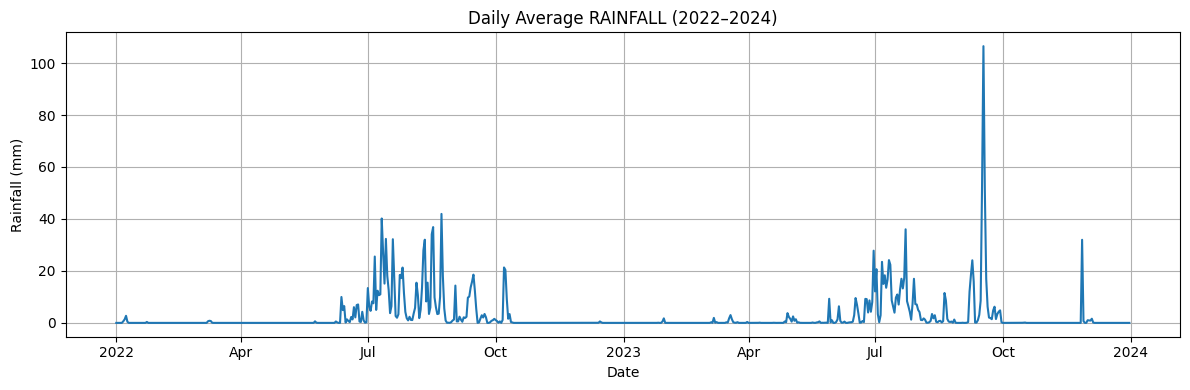

In [13]:
import xarray as xr
import matplotlib.pyplot as plt

# Load cropped dataset
file_path = r'B:\ml modeling project course\Hackathon\data\daily_cropped.nc'
ds = xr.open_dataset(file_path)

# Select time range: Jan 1, 2022 to Dec 31, 2024
ds_sel = ds.sel(time=slice("2022-01-01", "2023-12-31"))

# Choose variable (RAINFALL or rf depending on what’s present)
var_name = 'RAINFALL' if 'RAINFALL' in ds_sel.data_vars else 'rf'

# Average over spatial dimensions
daily_avg = ds_sel[var_name].mean(dim=["lat", "lon"])

# Print first few values
print(daily_avg)

# Plot time series
plt.figure(figsize=(12, 4))
daily_avg.plot()
plt.title(f"Daily Average {var_name} (2022–2024)")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()


Additive Decompose

C:\Users\shivp\AppData\Local\Temp\ipykernel_3304\3692887600.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rain_series = rain_series.fillna(method='ffill').fillna(method='bfill')


<Figure size 1400x800 with 0 Axes>

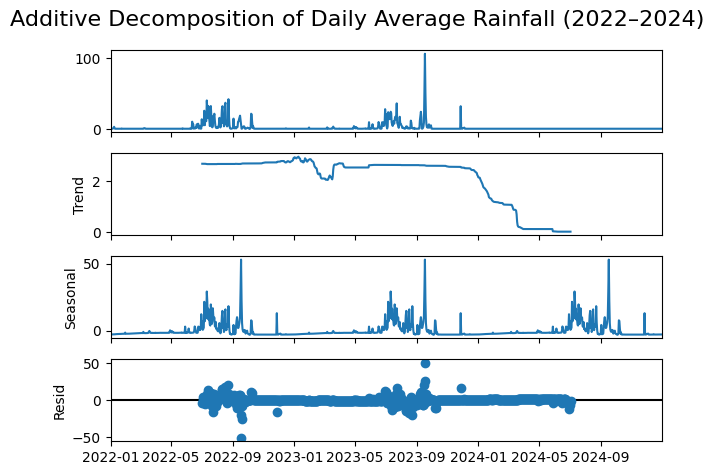

In [15]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Load cropped dataset
file_path = r'B:\ml modeling project course\Hackathon\data\daily_cropped.nc'
ds = xr.open_dataset(file_path)

# Select time range: Jan 1, 2022 to Dec 31, 2024
ds_sel = ds.sel(time=slice("2022-01-01", "2025-01-01"))

# Choose variable (RAINFALL or rf)
var_name = 'RAINFALL' if 'RAINFALL' in ds_sel.data_vars else 'rf'

# Average over spatial dimensions
daily_avg = ds_sel[var_name].mean(dim=["lat", "lon"])

# Convert to pandas Series
rain_series = pd.Series(daily_avg.values, index=pd.to_datetime(daily_avg['time'].values))

# Fill NaNs (if any)
rain_series = rain_series.fillna(method='ffill').fillna(method='bfill')

# Apply additive decomposition (safe for zero values)
decomposition = seasonal_decompose(rain_series, model='additive', period=365)

# Plot
plt.figure(figsize=(14, 8))
decomposition.plot()
plt.suptitle('Additive Decomposition of Daily Average Rainfall (2022–2024)', fontsize=16)
plt.tight_layout()
plt.show()


Hourly Time series

C:\Users\shivp\AppData\Local\Temp\ipykernel_3304\3956450113.py:8: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset(file_path)


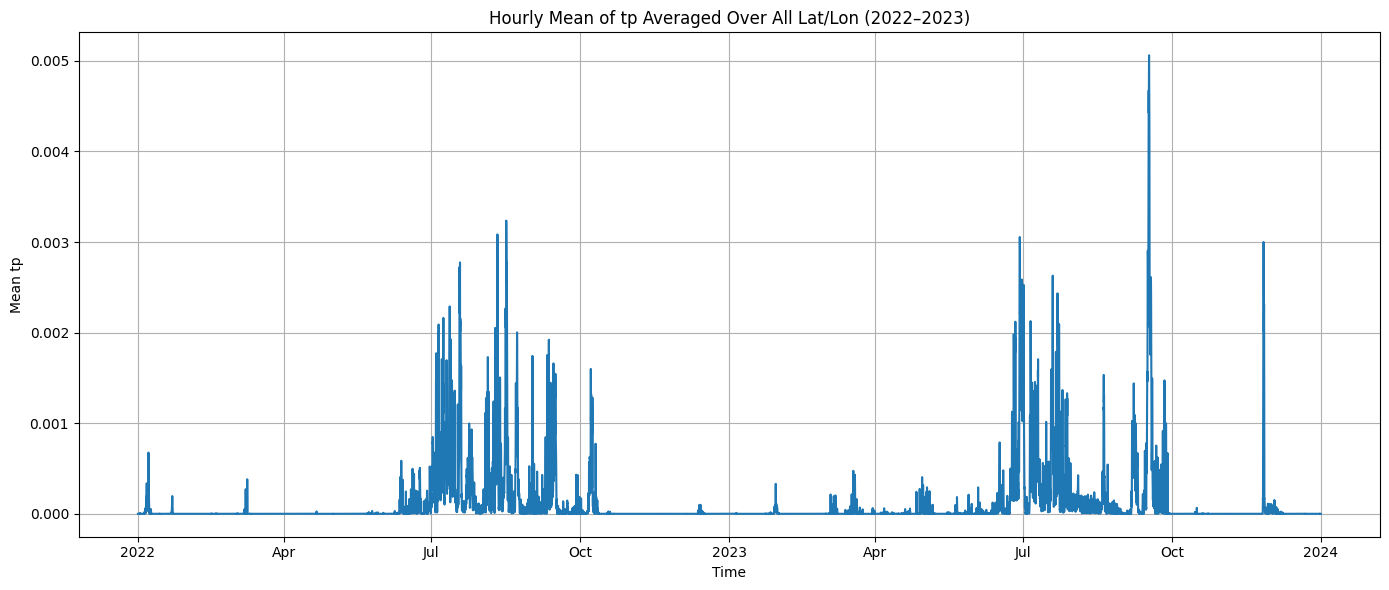

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset
file_path = r'B:\ml modeling project course\Hackathon\data\Hourlydata.nc'
ds = xr.open_dataset(file_path)

# Extract the variable
tp = ds['tp']  # shape: (time, step, lat, lon)

# Average over latitude and longitude
tp_mean_spatial = tp.mean(dim=['latitude', 'longitude'])  # shape: (time, step)

# Flatten and align time dimension
valid_times = ds['valid_time'].values.flatten()
tp_mean_flat = tp_mean_spatial.values.flatten()

# Create a new xarray DataArray for plotting
tp_series = xr.DataArray(tp_mean_flat, coords=[valid_times], dims=["time"])
tp_series = tp_series.sortby("time")

# Filter data for 2022 and 2023 only
tp_series_filtered = tp_series.sel(time=slice("2022-01-01", "2023-12-31"))

# Plot
plt.figure(figsize=(14, 6))
tp_series_filtered.plot()
plt.title('Hourly Mean of tp Averaged Over All Lat/Lon (2022–2023)')
plt.xlabel('Time')
plt.ylabel('Mean tp')
plt.grid(True)
plt.tight_layout()
plt.show()


Additive Decomopose hourly

C:\Users\shivp\AppData\Local\Temp\ipykernel_3304\2108261279.py:9: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset(file_path)
C:\Users\shivp\AppData\Local\Temp\ipykernel_3304\2108261279.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts = ts.asfreq('H')  # assume regular hourly data
C:\Users\shivp\AppData\Local\Temp\ipykernel_3304\2108261279.py:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts = ts.interpolate().fillna(method='bfill').fillna(method='ffill')


<Figure size 1400x800 with 0 Axes>

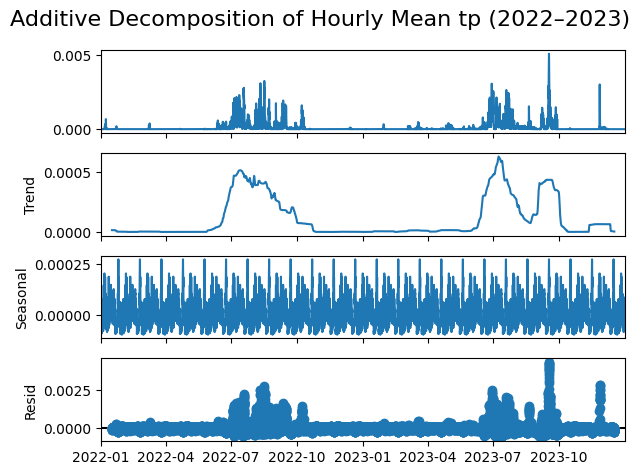

In [16]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = r'B:\ml modeling project course\Hackathon\data\Hourlydata.nc'
ds = xr.open_dataset(file_path)

# Extract and average over space
tp = ds['tp']
tp_mean_spatial = tp.mean(dim=['latitude', 'longitude'])
valid_times = ds['valid_time'].values.flatten()
tp_mean_flat = tp_mean_spatial.values.flatten()

# Create DataArray and convert to pandas Series
tp_series = xr.DataArray(tp_mean_flat, coords=[valid_times], dims=["time"])
tp_series = tp_series.sortby("time")
tp_series_filtered = tp_series.sel(time=slice("2022-01-01", "2023-12-31"))

# Convert to pandas Series
ts = pd.Series(tp_series_filtered.values, index=pd.to_datetime(tp_series_filtered.time.values))

# Ensure hourly frequency and fill missing values
ts = ts.asfreq('H')  # assume regular hourly data
ts = ts.interpolate().fillna(method='bfill').fillna(method='ffill')

# Apply additive decomposition (period = 24*30 ~ monthly seasonality)
decomposition = seasonal_decompose(ts, model='additive', period=24*30)

# Plot
plt.figure(figsize=(14, 8))
decomposition.plot()
plt.suptitle('Additive Decomposition of Hourly Mean tp (2022–2023)', fontsize=16)
plt.tight_layout()
plt.show()


Best Model Using Gradient Boosting Regressor

C:\Users\shivp\AppData\Local\Temp\ipykernel_3304\3390217786.py:10: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  hourly_ds = xr.open_dataset(r"B:\ml modeling project course\Hackathon\data\Hourlydata.nc")



🌧️ GBR Model Evaluation on 2023 Hourly Data (Trained on 2022):
🔹 RMSE: 0.316195 mm
🔹 MAE : 0.102554 mm
🔹 NSE : 0.3184


C:\Users\shivp\AppData\Local\Temp\ipykernel_3304\3390217786.py:100: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
b:\ml modeling project course\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


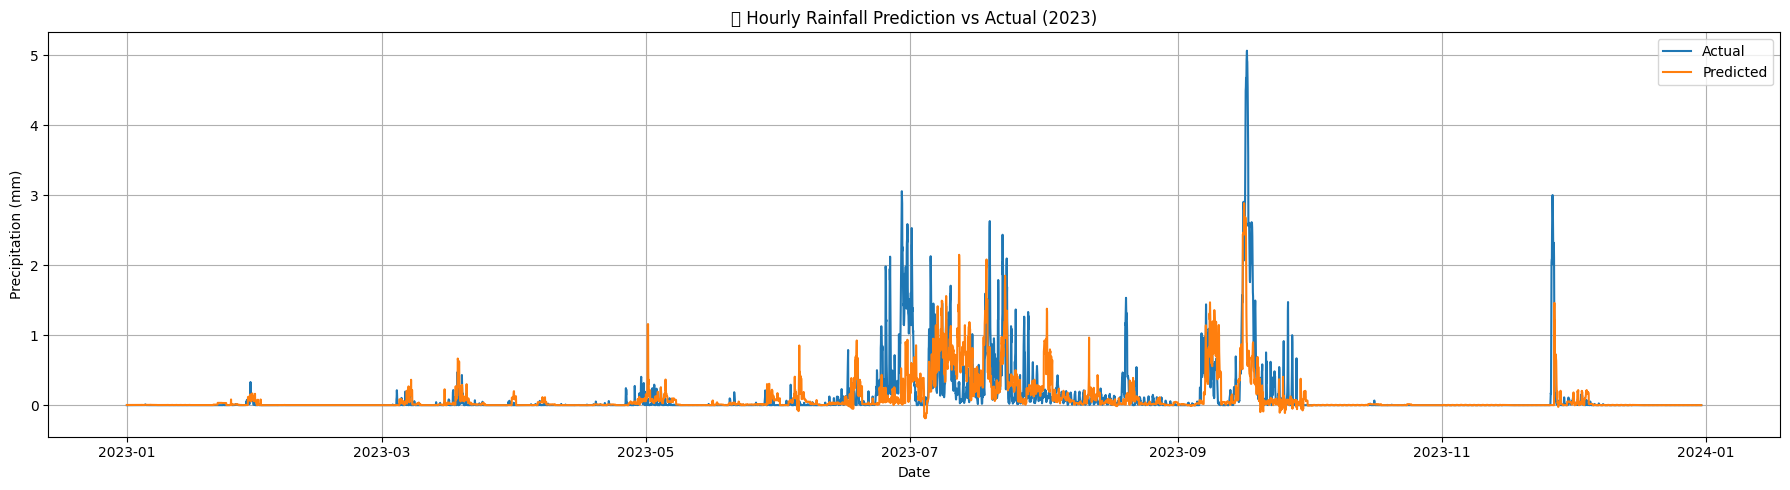

C:\Users\shivp\AppData\Local\Temp\ipykernel_3304\3390217786.py:111: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
b:\ml modeling project course\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


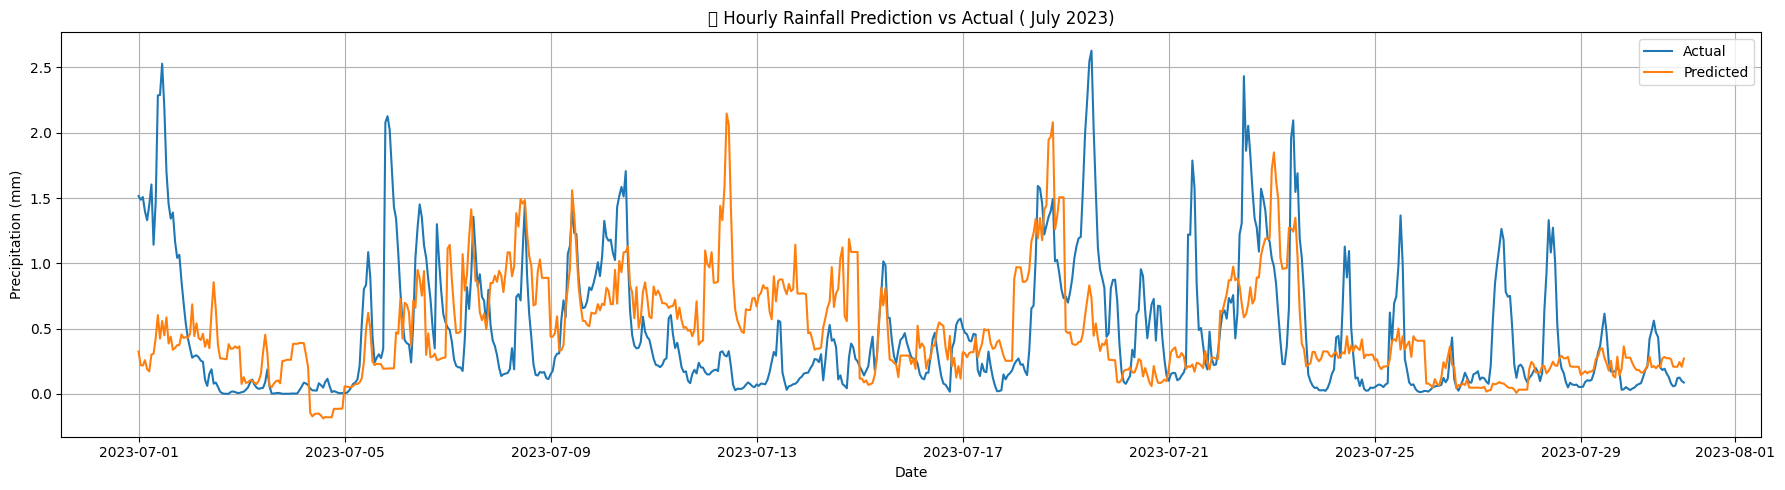

In [44]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# -------------------- Load Data --------------------
daily_ds = xr.open_dataset(r"B:\ml modeling project course\Hackathon\data\daily_cropped.nc")
hourly_ds = xr.open_dataset(r"B:\ml modeling project course\Hackathon\data\Hourlydata.nc")
daily_var = 'RAINFALL' if 'RAINFALL' in daily_ds.data_vars else 'rf'

# -------------------- Daily Processing --------------------
daily_df = daily_ds[daily_var].mean(dim=["lat", "lon"]).to_dataframe().reset_index()
daily_df['date'] = pd.to_datetime(daily_df['time']).dt.date

# -------------------- Hourly Ground Truth --------------------
tp = hourly_ds['tp'].mean(dim=['latitude', 'longitude']) * 1000  # Convert to mm
valid_times = pd.to_datetime(hourly_ds['valid_time'].values.flatten())
tp_df = pd.DataFrame({'datetime': valid_times, 'tp': tp.values.flatten()})
tp_df['date'] = tp_df['datetime'].dt.date
tp_df['hour'] = tp_df['datetime'].dt.hour

# -------------------- Hourly Distribution (2022) --------------------
tp_2022 = tp_df[(tp_df['datetime'] >= "2022-01-01") & (tp_df['datetime'] <= "2022-12-31")]
tp_2023 = tp_df[(tp_df['datetime'] >= "2023-01-01") & (tp_df['datetime'] <= "2023-12-31")]

hourly_percent = tp_2022.groupby('hour')['tp'].sum()
hourly_percent = (hourly_percent / hourly_percent.sum()).to_dict()

# -------------------- Redistribute Daily Rainfall --------------------
def redistribute_daily_to_hourly(daily_df, hourly_percent, year):
    redistributed = []
    for _, row in daily_df[daily_df['date'].apply(lambda d: str(d).startswith(str(year)))].iterrows():
        for hour in range(24):
            val = row[daily_var] * hourly_percent.get(hour, 0)
            redistributed.append({
                'datetime': pd.Timestamp(f"{row['date']} {hour}:00:00"),
                'redistributed_tp': val
            })
    return pd.DataFrame(redistributed)

redistributed_2022 = redistribute_daily_to_hourly(daily_df, hourly_percent, 2022)
redistributed_2023 = redistribute_daily_to_hourly(daily_df, hourly_percent, 2023)

# -------------------- Prepare Training Data --------------------
train_df = pd.merge(tp_2022, redistributed_2022, on='datetime')
train_df['hour'] = train_df['datetime'].dt.hour
train_df['day'] = train_df['datetime'].dt.day
train_df['month'] = train_df['datetime'].dt.month
train_df['year'] = train_df['datetime'].dt.year

features = ['redistributed_tp', 'hour', 'day', 'month']
X_train = train_df[features]
y_train = train_df['tp']

# -------------------- Prepare Test Data --------------------
test_df = pd.merge(tp_2023, redistributed_2023, on='datetime')
test_df['hour'] = test_df['datetime'].dt.hour
test_df['day'] = test_df['datetime'].dt.day
test_df['month'] = test_df['datetime'].dt.month
test_df['year'] = test_df['datetime'].dt.year

X_test = test_df[features]
y_test = test_df['tp']

# -------------------- Train Model --------------------
model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.03, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# -------------------- Predict --------------------
y_pred = model.predict(X_test)

# -------------------- Evaluation --------------------
def nse(predictions, targets):
    return 1 - np.sum((predictions - targets) ** 2) / np.sum((targets - np.mean(targets)) ** 2)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
nse_score = nse(y_pred, y_test)

print(f"\n🌧️ GBR Model Evaluation on 2023 Hourly Data (Trained on 2022):")
print(f"🔹 RMSE: {rmse:.6f} mm")
print(f"🔹 MAE : {mae:.6f} mm")
print(f"🔹 NSE : {nse_score:.4f}")

# -------------------- Plot (July 2023) --------------------
plot_df = test_df.copy()
plot_df['predicted_tp'] = y_pred
year_df = plot_df[plot_df['datetime'].between("2023-01-01", "2023-12-31")]
july_df = plot_df[plot_df['datetime'].between("2023-07-01", "2023-07-31")]
plt.figure(figsize=(18, 5))
plt.plot(year_df['datetime'], year_df['tp'], label='Actual')
plt.plot(year_df['datetime'], year_df['predicted_tp'], label='Predicted')
plt.title('🌧️ Hourly Rainfall Prediction vs Actual (2023)')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 5))
plt.plot(july_df['datetime'], july_df['tp'], label='Actual')
plt.plot(july_df['datetime'], july_df['predicted_tp'], label='Predicted')
plt.title('🌧️ Hourly Rainfall Prediction vs Actual ( July 2023)')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Hybrid Model 

C:\Users\shivp\AppData\Local\Temp\ipykernel_3304\4190985726.py:18: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  hourly_ds = xr.open_dataset(r"B:\ml modeling project course\Hackathon\data\Hourlydata.nc")



🌧️ Hybrid Model Evaluation (2023):
🔹 RMSE: 0.334301 mm
🔹 MAE : 0.107670 mm
🔹 NSE : 0.2363


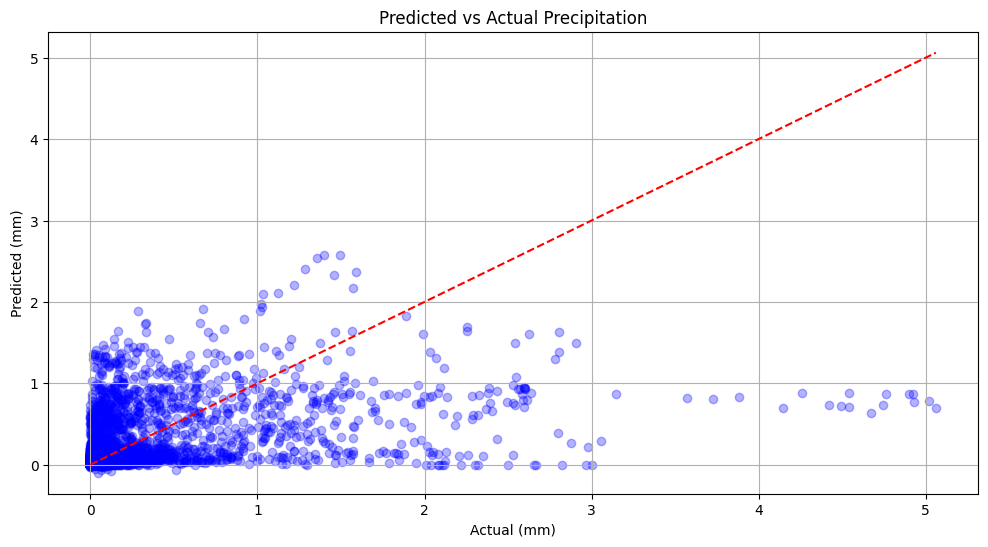

C:\Users\shivp\AppData\Local\Temp\ipykernel_3304\4190985726.py:207: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
b:\ml modeling project course\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


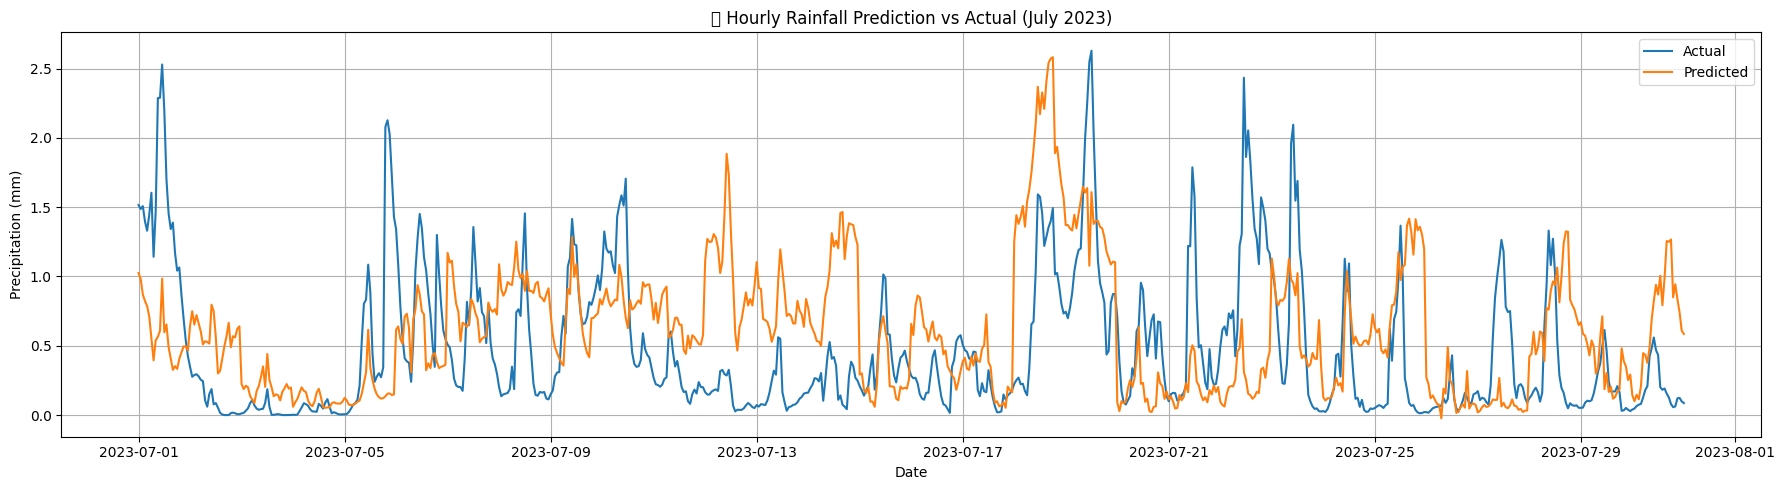

In [42]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, RegressorMixin

# -------------------- Data Loading & Preprocessing --------------------
def load_and_preprocess_data():
    # Load datasets
    daily_ds = xr.open_dataset(r"B:\ml modeling project course\Hackathon\data\daily_cropped.nc")
    hourly_ds = xr.open_dataset(r"B:\ml modeling project course\Hackathon\data\Hourlydata.nc")
    
    # Handle variable names
    daily_var = 'RAINFALL' if 'RAINFALL' in daily_ds.data_vars else 'rf'
    
    # Process daily data
    daily_df = daily_ds[daily_var].mean(dim=["lat", "lon"]).to_dataframe().reset_index()
    daily_df['date'] = pd.to_datetime(daily_df['time']).dt.date
    
    # Process hourly data
    tp = hourly_ds['tp'].mean(dim=['latitude', 'longitude']) * 1000  # Convert to mm
    valid_times = pd.to_datetime(hourly_ds['valid_time'].values.flatten())
    tp_df = pd.DataFrame({'datetime': valid_times, 'tp': tp.values.flatten()})
    tp_df['date'] = tp_df['datetime'].dt.date
    tp_df['hour'] = tp_df['datetime'].dt.hour
    
    return daily_df, tp_df, daily_var

# -------------------- Feature Engineering --------------------
def create_features(df):
    # Cyclical time features
    df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)
    
    # Temporal features
    df['day_of_year'] = df['datetime'].dt.dayofyear
    df['month'] = df['datetime'].dt.month
    df['season'] = df['month'] % 12 // 3
    df['is_monsoon'] = df['month'].between(6, 9).astype(int)
    
    # Rolling features
    df['rolling_3h'] = df['redistributed_tp'].rolling(3, min_periods=1).mean()
    df['rolling_12h'] = df['redistributed_tp'].rolling(12, min_periods=1).mean()
    
    # Difference features
    df['diff_1h'] = df['redistributed_tp'].diff(1).fillna(0)
    
    return df



class HybridModel(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators_gb=600, n_estimators_rf=250, hidden_size=64):
        self.n_estimators_gb = n_estimators_gb
        self.n_estimators_rf = n_estimators_rf
        self.hidden_size = hidden_size
        
        self.gb = GradientBoostingRegressor(n_estimators=self.n_estimators_gb, 
                                          max_depth=8, learning_rate=0.02,
                                          subsample=0.8, random_state=42)
        self.rf = RandomForestRegressor(n_estimators=self.n_estimators_rf,
                                      max_depth=10, random_state=42)
        self.nn = MLPRegressor(hidden_layer_sizes=(self.hidden_size, self.hidden_size//2),
                             activation='relu', early_stopping=True,
                             random_state=42)
        self.meta = ElasticNet(alpha=0.001, l1_ratio=0.7, random_state=42)

    def get_params(self, deep=True):
        return {
            'n_estimators_gb': self.n_estimators_gb,
            'n_estimators_rf': self.n_estimators_rf,
            'hidden_size': self.hidden_size
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def fit(self, X, y):
        self.gb.fit(X, y)
        self.rf.fit(X, y)
        self.nn.fit(X, y)
        
        # Create meta-features
        preds_gb = self.gb.predict(X)
        preds_rf = self.rf.predict(X)
        preds_nn = self.nn.predict(X)
        
        meta_features = np.column_stack([preds_gb, preds_rf, preds_nn])
        self.meta.fit(meta_features, y)
        return self
    
    def predict(self, X):
        preds_gb = self.gb.predict(X)
        preds_rf = self.rf.predict(X)
        preds_nn = self.nn.predict(X)
        
        meta_features = np.column_stack([preds_gb, preds_rf, preds_nn])
        return self.meta.predict(meta_features)


# -------------------- Main Execution --------------------
def main():
    # Load and preprocess data
    daily_df, tp_df, daily_var = load_and_preprocess_data()
    
    # Calculate hourly distribution
    tp_2022 = tp_df[(tp_df['datetime'] >= "2022-01-01") & (tp_df['datetime'] <= "2022-12-31")]
    hourly_percent = tp_2022.groupby('hour')['tp'].sum()
    hourly_percent = (hourly_percent / hourly_percent.sum()).to_dict()
    
    # Redistribute daily rainfall
    def redistribute_daily(daily_df, hourly_percent, year):
        redistributed = []
        for _, row in daily_df[daily_df['date'].apply(lambda d: str(d).startswith(str(year)))].iterrows():
            for hour in range(24):
                val = row[daily_var] * hourly_percent.get(hour, 0)
                redistributed.append({
                    'datetime': pd.Timestamp(f"{row['date']} {hour}:00:00"),
                    'redistributed_tp': val
                })
        return pd.DataFrame(redistributed)
    
    # Create training and test data
    redistributed_2022 = redistribute_daily(daily_df, hourly_percent, 2022)
    redistributed_2023 = redistribute_daily(daily_df, hourly_percent, 2023)
    
    # Merge with ground truth
    train_df = pd.merge(tp_2022, redistributed_2022, on='datetime')
    test_df = pd.merge(tp_df[tp_df['datetime'] >= "2023-01-01"], redistributed_2023, on='datetime')
    
    # Feature engineering
    train_df = create_features(train_df)
    test_df = create_features(test_df)
    
    # Final feature selection
    features = ['redistributed_tp', 'hour_sin', 'hour_cos', 'day_of_year',
                'rolling_3h', 'rolling_12h', 'diff_1h', 'is_monsoon']
    
    # Prepare data
    X_train, y_train = train_df[features], train_df['tp']
    X_test, y_test = test_df[features], test_df['tp']
    
    # Hyperparameter tuning
    param_dist = {
        'n_estimators_gb': [500, 600, 700],
        'n_estimators_rf': [200, 250, 300],
        'hidden_size': [64, 96, 128]
    }
    
    tscv = TimeSeriesSplit(n_splits=5)
    search = RandomizedSearchCV(HybridModel(), param_dist, n_iter=15, 
                               cv=tscv, scoring='neg_mean_squared_error', 
                               random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)
    
    best_model = search.best_estimator_
    
    # Final predictions
    y_pred = best_model.predict(X_test)
    
    # Evaluation
    def nse(predictions, targets):
        return 1 - (np.sum((predictions - targets) ** 2) / 
                    np.sum((targets - np.mean(targets)) ** 2))
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    nse_score = nse(y_pred, y_test)
    
    print(f"\n🌧️ Hybrid Model Evaluation (2023):")
    print(f"🔹 RMSE: {rmse:.6f} mm")
    print(f"🔹 MAE : {mae:.6f} mm")
    print(f"🔹 NSE : {nse_score:.4f}")
    
    # Diagnostic plots
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_pred, alpha=0.3, c='blue')
    plt.plot([0, y_test.max()], [0, y_test.max()], 'r--')
    plt.title('Predicted vs Actual Precipitation')
    plt.xlabel('Actual (mm)')
    plt.ylabel('Predicted (mm)')
    plt.grid(True)
    plt.show()
    
    # Time series plot
    plot_df = test_df.copy()
    plot_df['predicted_tp'] = y_pred
    july_df = plot_df[plot_df['datetime'].between("2023-07-01", "2023-07-31")]
    
    plt.figure(figsize=(18, 5))
    plt.plot(july_df['datetime'], july_df['tp'], label='Actual')
    plt.plot(july_df['datetime'], july_df['predicted_tp'], label='Predicted')
    plt.title('🌧️ Hourly Rainfall Prediction vs Actual (July 2023)')
    plt.xlabel('Date')
    plt.ylabel('Precipitation (mm)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
